<a href="https://colab.research.google.com/github/jtghchau/TextClassification/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english", output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [3]:
sentences = [
    "I absolutely love this film, but it’s also very disturbing.",
    "The food was terrible, and I wouldn’t recommend it at all.",
    "I really loved this movie, but I do not recommend it to kids.",
    "It’s brilliantly directed but painfully slow.",
    "The acting was outstanding, but the story was awful."
]

def getAttention(sentence):
  tokens = tokenizer(sentence, return_tensors="pt", truncation=True)

  with torch.no_grad():
    outputs = model(**tokens, output_attentions=True)

  attentions = outputs.attentions
  return tokens, attentions

def plotAttention(tokens, attention, layer=0, head=0):
    token_list = tokenizer.convert_ids_to_tokens(tokens["input_ids"][0])

    attentionWeights = attention[layer][0, head].cpu().numpy()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(attentionWeights, xticklabels=token_list, yticklabels=token_list, cmap="Blues", annot=False)
    plt.title(f"Layer {layer}, Head {head} Attention Weights")
    plt.xlabel("Key Tokens")
    plt.ylabel("Query Tokens")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: I absolutely love this film, but it’s also very disturbing.


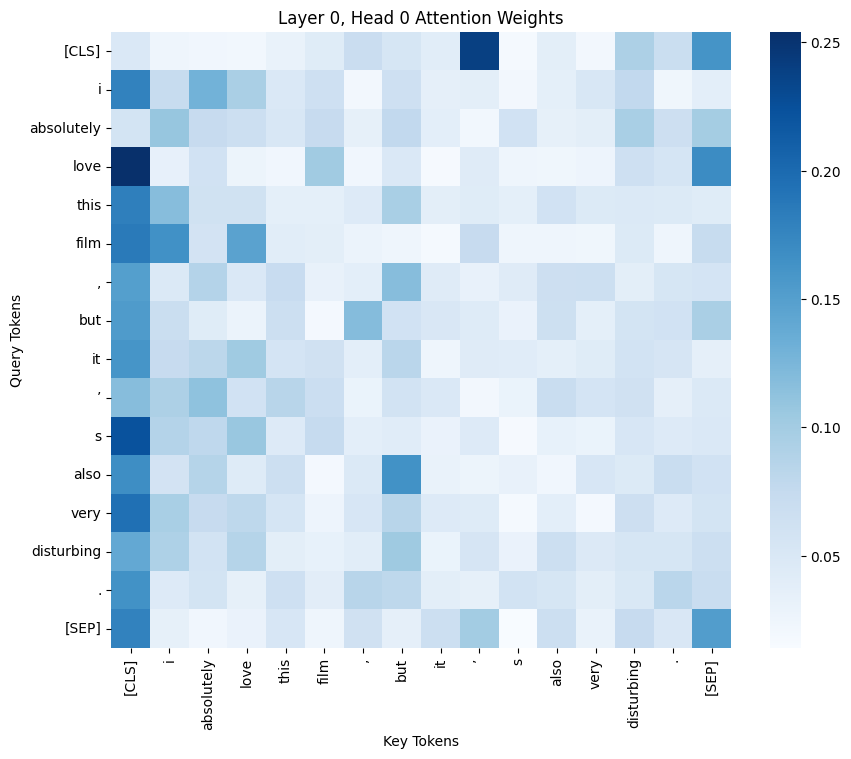

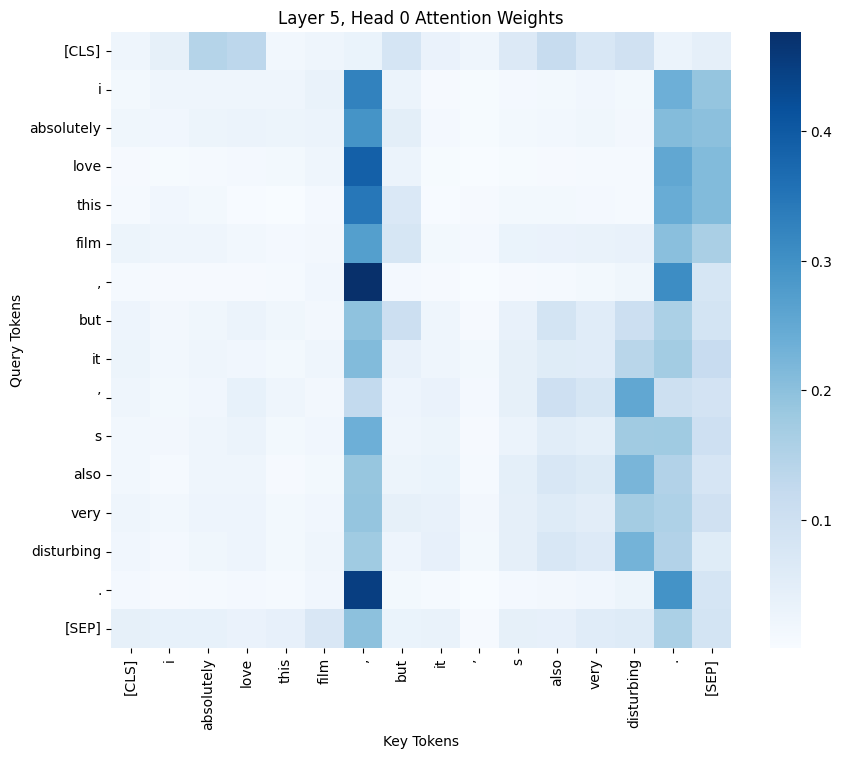

----------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: The food was terrible, and I wouldn’t recommend it at all.


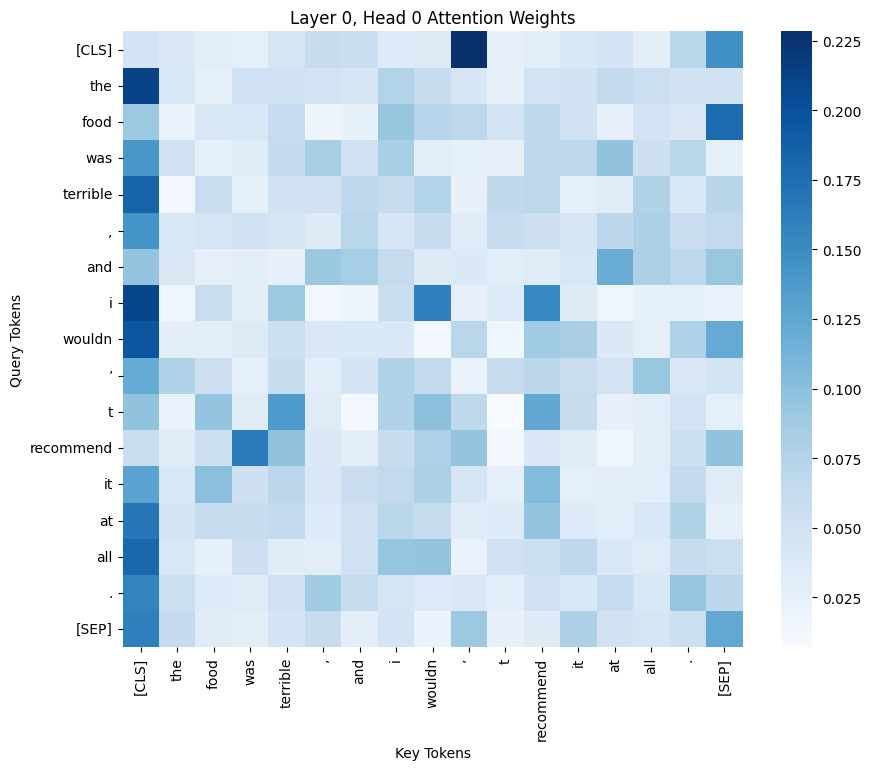

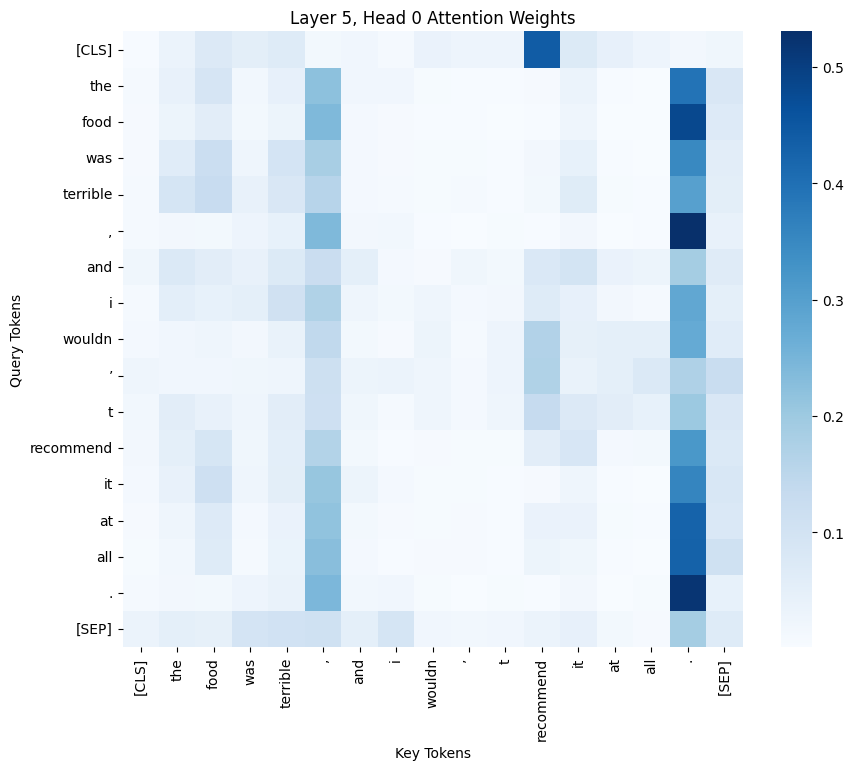

----------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: I really loved this movie, but I do not recommend it to kids.


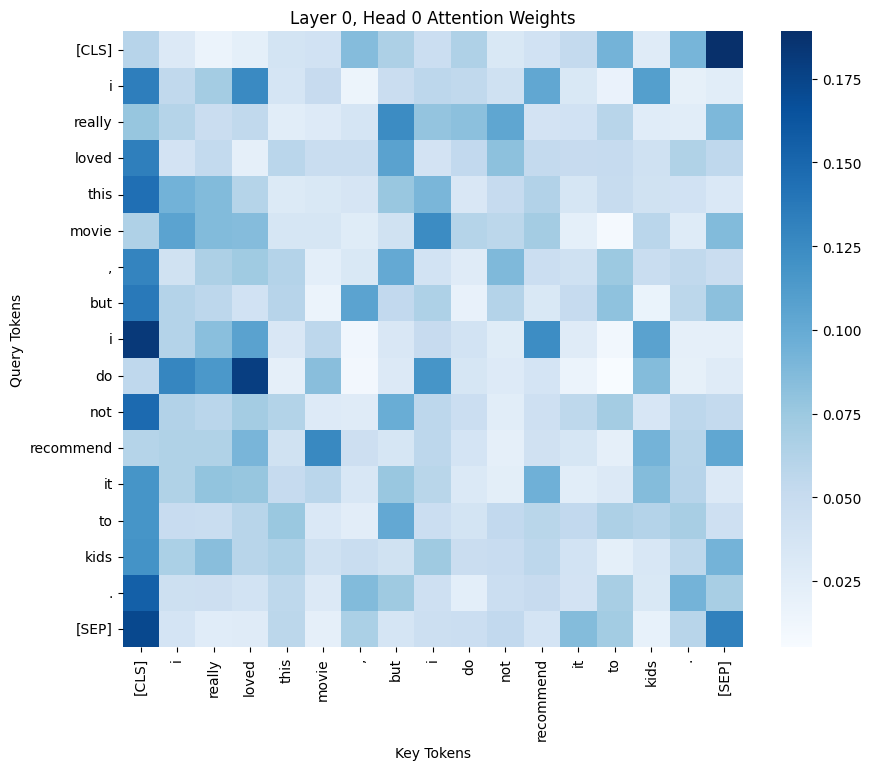

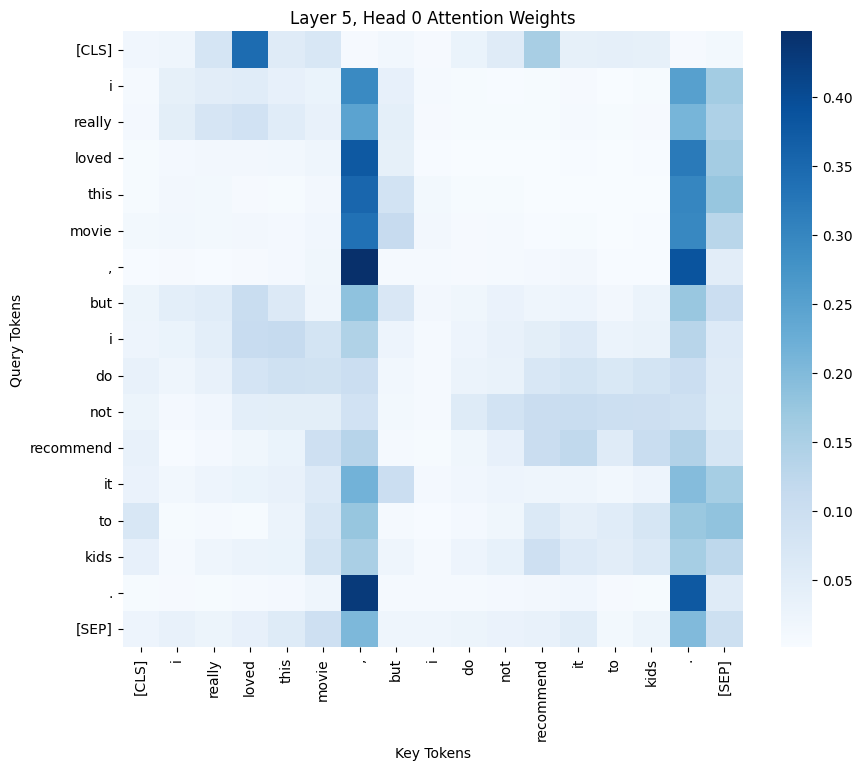

----------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: It’s brilliantly directed but painfully slow.


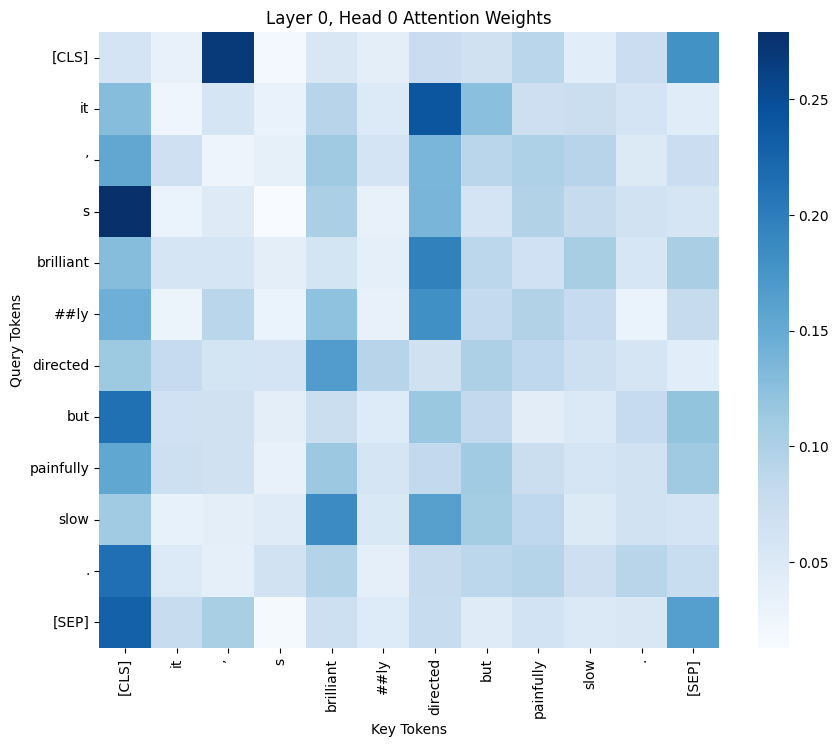

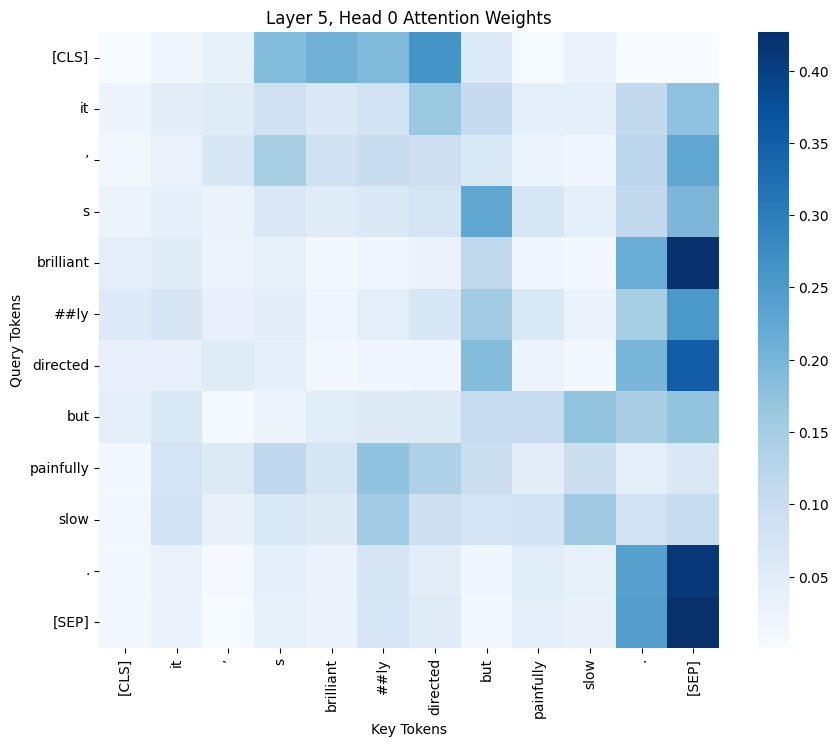

----------------------------------------------------------------------------------------------------------------------------------------------------
Sentence: The acting was outstanding, but the story was awful.


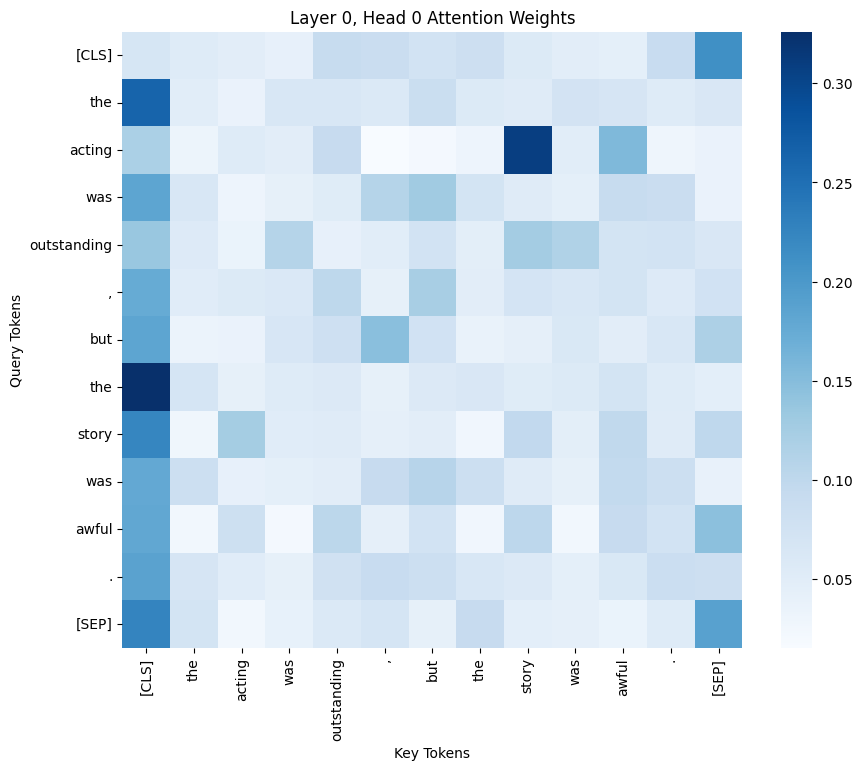

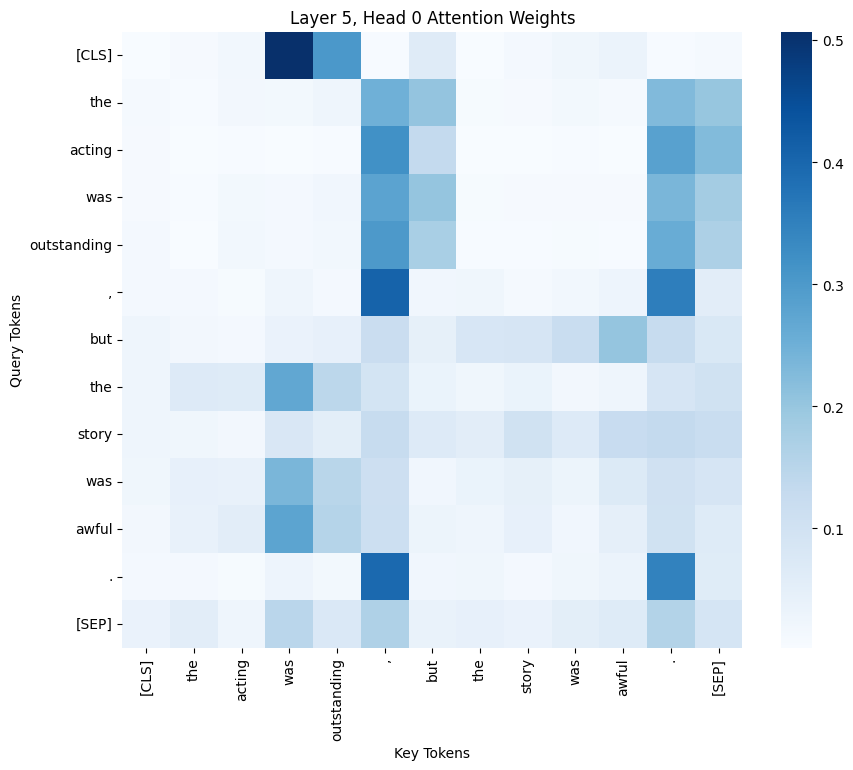

In [7]:
for sentence in sentences:
  tokens, attentions = getAttention(sentence)
  print("----------------------------------------------------------------------------------------------------------------------------------------------------")
  print(f"Sentence: {sentence}")
  plotAttention(tokens, attentions, layer=0, head=0)
  print("\n")
  plotAttention(tokens, attentions, layer=5, head=0)


---

#**Deliverables**

---

